# Curs 5. Baza de date Neon

In [2]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

## Aduc datele

In [2]:
eia = pd.read_csv("../data/eia_clean.csv")
eia.head(2)

,country_iso3,country_name,year,indicator_code,indicator_name,indicator_label,unit,unit_name,value
0,ABW,Aruba,2024,GROS_GDP,gross_domestic_product_gdp,Gross Domestic Product – Gdp,BDOLPPP,billion_dollars_at_purchasing_power_parities,3.768053
1,AFG,Afghanistan,2024,GROS_GDP,gross_domestic_product_gdp,Gross Domestic Product – Gdp,BDOLPPP,billion_dollars_at_purchasing_power_parities,64.92137


In [3]:
wdi = pd.read_csv("../data/wdi_country.csv")
wdi.head(2)

,country_iso3,year,indicator_code,indicator_name,indicator_label,value
0,AFG,2023,NY.GDP.PCAP.CD,gdp_per_capita,GDP per capita (current US$),413.757895
1,AFG,2022,NY.GDP.PCAP.CD,gdp_per_capita,GDP per capita (current US$),357.261153


# Ne conectam la Neon

In [ ]:
load_dotenv()
print(repr(os.getenv("NEON_URL")))

In [6]:
# create engine using sqlalchemy
engine = create_engine(os.getenv("NEON_URL"))

In [8]:
pd.read_sql("SELECT 1", engine)

,?column?
0,1


# Incarc datele in Neon

In [13]:
import pandas as pd
pd.read_sql("SELECT schema_name FROM information_schema.schemata;", engine)



,schema_name
0,public
1,information_schema
2,pg_catalog


In [31]:
# Incarcam wdi

wdi.to_sql(
    "wdi",
    engine,
    if_exists="replace",
    index=False
)


208

In [15]:
pd.read_sql("SELECT COUNT(*) FROM wdi;", engine)


,count
0,62208


In [19]:
# Incarcam eia
eia.to_sql(
    "eia",
    engine,
    if_exists="replace",
    index=False
)

340

## Să ne uităm la tabelele din baza de date

In [7]:
tables = pd.read_sql("""
    SELECT table_name 
    FROM information_schema.tables 
    WHERE table_schema = 'public';
""", engine)

tables


,table_name
0,eia
1,wdi
2,all_data_long


In [51]:
# coloanele tabelului
pd.read_sql("""
SELECT column_name
FROM information_schema.columns
WHERE table_name = 'eia';
""", engine)

,column_name
0,year
1,country_name
2,indicator_code
3,indicator_name
4,indicator_label
5,unit
6,unit_name
7,country_iso3
8,value


# SQL In Python

In [ ]:
# SELECT simplu pe WDI
query = """
SELECT year, value, indicator_code
FROM wdi
WHERE country_iso3 = 'ROU'
ORDER BY year DESC;
"""

romania_gdp = pd.read_sql(query, engine)
romania_gdp


,year,value,indicator_code
0,2023,100.000000,EG.ELC.ACCS.ZS
1,2023,0.437426,RL.EST
2,2023,0.040495,CC.EST
3,2023,NaN,EG.FEC.RNEW.ZS
4,2023,18404.273087,NY.GDP.PCAP.CD
...,...,...,...
283,2000,16.400000,EG.FEC.RNEW.ZS
284,2000,71.163415,SP.DYN.LE00.IN
285,2000,-0.262159,GE.EST
286,2000,1659.929049,NY.GDP.PCAP.CD


In [ ]:
# Exemplu SQL 4 – grupare pe regiuni 
pd.read_sql("""
SELECT indicator_code, year, AVG(value) AS avg_value
FROM wdi
WHERE indicator_code = 'NY.GDP.PCAP.CD'
GROUP BY indicator_code, year
ORDER BY year
LIMIT 5;
""", engine)


,indicator_code,year,avg_value
0,NY.GDP.PCAP.CD,2000,8031.243408
1,NY.GDP.PCAP.CD,2001,8051.939611
2,NY.GDP.PCAP.CD,2002,8732.043114
3,NY.GDP.PCAP.CD,2003,10070.058410
4,NY.GDP.PCAP.CD,2004,11457.769745


<Axes: title={'center': 'PIB per capita România'}, xlabel='year'>

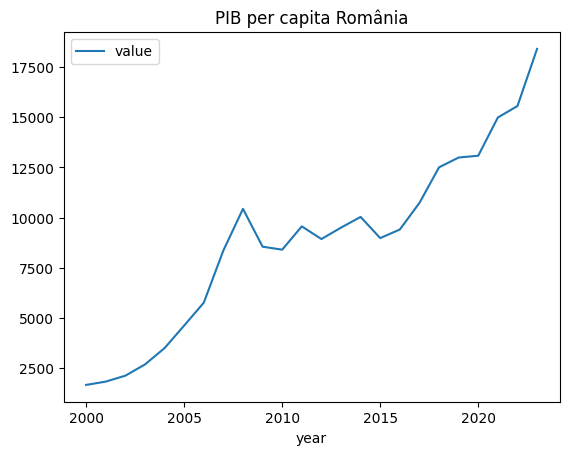

In [ ]:
# combinație SQL + pandas (plot)
df = pd.read_sql("""
SELECT year, value
FROM wdi
WHERE country_iso3 = 'ROU'
  AND indicator_code = 'NY.GDP.PCAP.CD'
ORDER BY year;
""", engine)

df.plot(x='year', y='value', title='PIB per capita România')


In [53]:
pd.read_sql("""
SELECT DISTINCT year 
FROM eia
WHERE indicator_name = 'co2_emissions_emissions'
ORDER BY year;
""", engine)


,year
0,2001
1,2002
2,2003
3,2004
4,2005
5,2006
6,2007
7,2008
8,2009
9,2010
